<a href="https://colab.research.google.com/github/manasik29/Decision_Tree_C5.0/blob/main/Decision_Tree_C5_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Load dataset and libraries**



In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [3]:
data = pd.read_csv('/content/Iris.csv')

In [4]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
data = data.drop('Id', axis=1)

In [11]:
data = data.rename({'SepalLengthCm':'sepallength', 'SepalWidthCm':'sepalwidth', 'PetalLengthCm':'petallength', 'PetalWidthCm':'petalwidth'}, axis=1)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sepallength  150 non-null    float64
 1   sepalwidth   150 non-null    float64
 2   petallength  150 non-null    float64
 3   petalwidth   150 non-null    float64
 4   Species      150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [15]:
data.shape

(150, 5)

In [16]:
data.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [17]:
data.Species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [18]:
#check for missing values
data.isna().sum()

sepallength    0
sepalwidth     0
petallength    0
petalwidth     0
Species        0
dtype: int64

In [21]:
#check for duplicated values
data[data.duplicated()]

,sepallength,sepalwidth,petallength,petalwidth,Species
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


Let's treat the duplicate values later in our program.

# **Data Visualisation**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


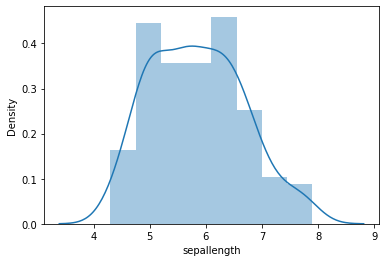

In [22]:
sns.distplot(data.sepallength)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


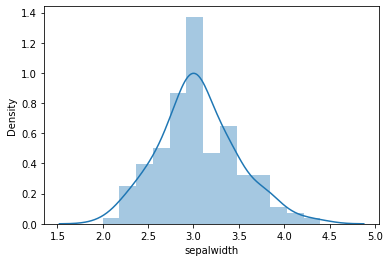

In [23]:
sns.distplot(data.sepalwidth)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


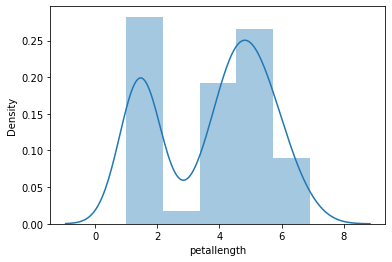

In [24]:
sns.distplot(data.petallength)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


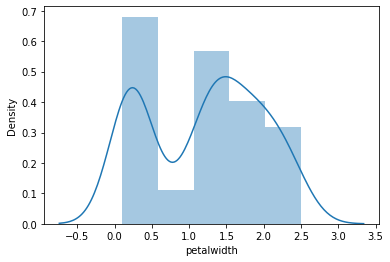

In [25]:
sns.distplot(data.petalwidth)

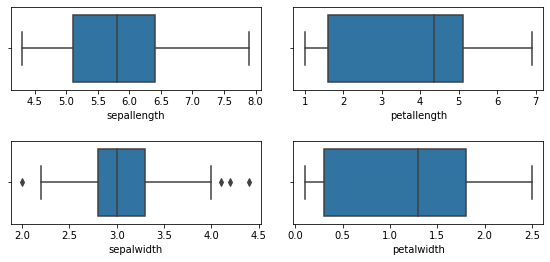

In [28]:
#check for outliers
fig, axes=plt.subplots(2,2,figsize=(8,4),sharex=False,sharey=False)
sns.boxplot(x='sepallength',data=data,ax=axes[0,0])
sns.boxplot(x='sepalwidth',data=data,ax=axes[1,0])
sns.boxplot(x='petallength',data=data,ax=axes[0,1])
sns.boxplot(x='petalwidth',data=data,ax=axes[1,1])
plt.tight_layout(pad=2.0)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


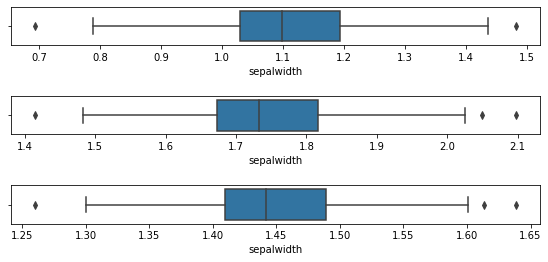

In [30]:
#treat outliers in 'sepalwidth' by log, sqrt and cbrt transformation
fig, axes=plt.subplots(3,figsize=(8,4),sharex=False,sharey=False)
sns.boxplot(np.log(data.sepalwidth), ax=axes[0])
sns.boxplot(np.sqrt(data.sepalwidth), ax=axes[1])
sns.boxplot(np.cbrt(data.sepalwidth), ax=axes[2])
plt.tight_layout(pad=2.0)

As we can observe none of the transformation are helping to eliminate outliers altogether. 

Text(0, 0.5, 'Petal Length')

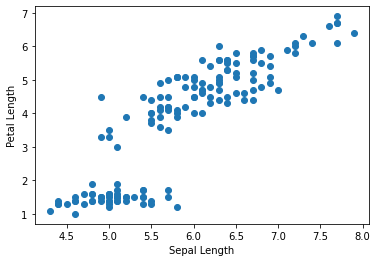

In [36]:
#multivariate analysis
plt.scatter(x= 'sepallength', y= 'petallength', data = data)
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")

There is a positive correlation.

Text(0, 0.5, 'Petal Width')

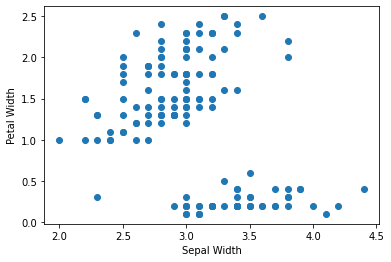

In [37]:
plt.scatter(x= 'sepalwidth', y= 'petalwidth', data = data)
plt.xlabel("Sepal Width")
plt.ylabel("Petal Width")

Text(0, 0.5, 'Sepal Length')

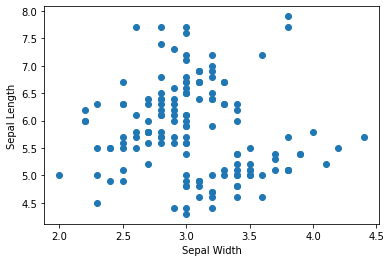

In [38]:
plt.scatter(x= 'sepalwidth', y= 'sepallength', data = data)
plt.xlabel("Sepal Width")
plt.ylabel("Sepal Length")

Text(0, 0.5, 'Petal Length')

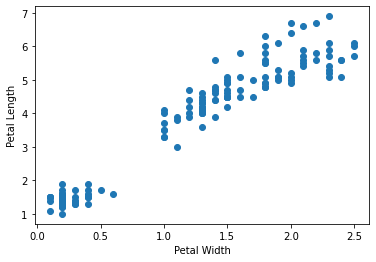

In [39]:
plt.scatter(x= 'petalwidth', y= 'petallength', data = data)
plt.xlabel("Petal Width")
plt.ylabel("Petal Length")

Highly positively correlated.

Text(0, 0.5, 'Sepal Length')

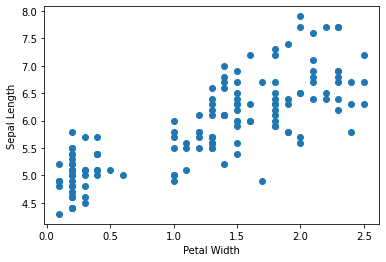

In [40]:
plt.scatter(x= 'petalwidth', y= 'sepallength', data = data)
plt.xlabel("Petal Width")
plt.ylabel("Sepal Length")

Text(0, 0.5, 'Petal Length')

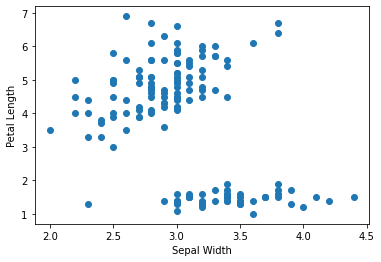

In [41]:
plt.scatter(x= 'sepalwidth', y= 'petallength', data = data)
plt.xlabel("Sepal Width")
plt.ylabel("Petal Length")

In [42]:
data.corr()

,sepallength,sepalwidth,petallength,petalwidth
sepallength,1.000000,-0.109369,0.871754,0.817954
sepalwidth,-0.109369,1.000000,-0.420516,-0.356544
petallength,0.871754,-0.420516,1.000000,0.962757
petalwidth,0.817954,-0.356544,0.962757,1.000000


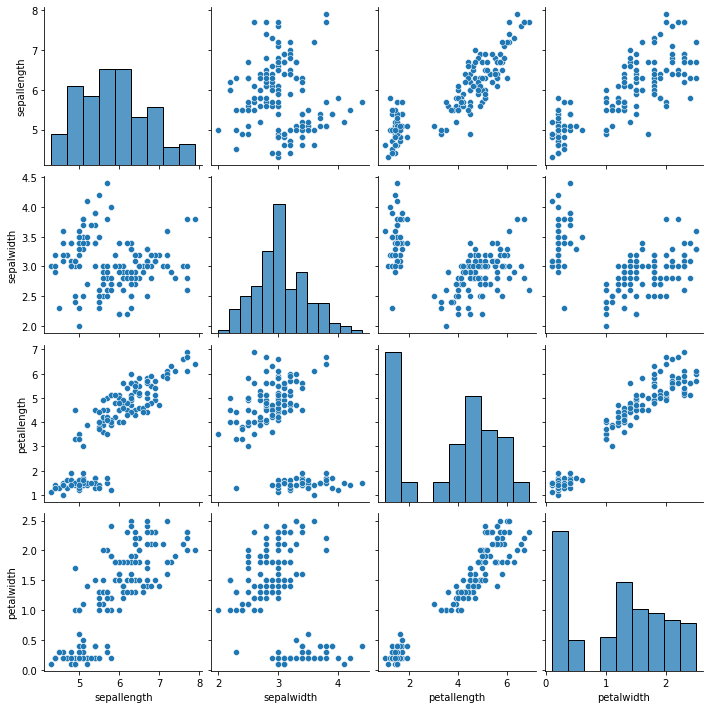

In [43]:
sns.pairplot(data)

In [44]:
#preprocessing the data
label_encoder = preprocessing.LabelEncoder()
data['iris'] = label_encoder.fit_transform(data['Species'])


In [46]:
data.iris.unique()

array([0, 1, 2])

In [47]:
data.iris.value_counts()

0    50
1    50
2    50
Name: iris, dtype: int64

In [49]:
#divide data into dependent and independent variables
x = data.iloc[:,0:4]
y = data['iris']

In [50]:
x

,sepallength,sepalwidth,petallength,petalwidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [51]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: iris, Length: 150, dtype: int64

In [52]:
#get train and test data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=40)

# **Building Decision Tree based on Entropy criteria**

In [54]:
model = DecisionTreeClassifier(criterion = 'entropy', max_depth=3)
model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

[Text(0.375, 0.875, 'X[3] <= 0.8\nentropy = 1.584\nsamples = 120\nvalue = [42, 38, 40]'),
 Text(0.25, 0.625, 'entropy = 0.0\nsamples = 42\nvalue = [42, 0, 0]'),
 Text(0.5, 0.625, 'X[3] <= 1.75\nentropy = 1.0\nsamples = 78\nvalue = [0, 38, 40]'),
 Text(0.25, 0.375, 'X[2] <= 4.95\nentropy = 0.527\nsamples = 42\nvalue = [0, 37, 5]'),
 Text(0.125, 0.125, 'entropy = 0.183\nsamples = 36\nvalue = [0, 35, 1]'),
 Text(0.375, 0.125, 'entropy = 0.918\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.75, 0.375, 'X[2] <= 4.85\nentropy = 0.183\nsamples = 36\nvalue = [0, 1, 35]'),
 Text(0.625, 0.125, 'entropy = 1.0\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.875, 0.125, 'entropy = 0.0\nsamples = 34\nvalue = [0, 0, 34]')]

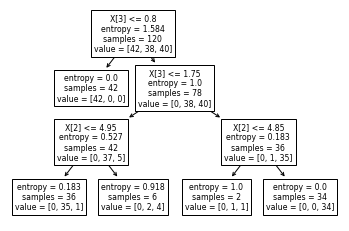

In [55]:
#plot decision tree
tree.plot_tree(model)

[Text(0.375, 0.875, 'petal width (cm) <= 0.8\nentropy = 1.584\nsamples = 120\nvalue = [42, 38, 40]\nclass = versicolor'),
 Text(0.25, 0.625, 'entropy = 0.0\nsamples = 42\nvalue = [42, 0, 0]\nclass = versicolor'),
 Text(0.5, 0.625, 'petal width (cm) <= 1.75\nentropy = 1.0\nsamples = 78\nvalue = [0, 38, 40]\nclass = virginica'),
 Text(0.25, 0.375, 'petal length (cm) <= 4.95\nentropy = 0.527\nsamples = 42\nvalue = [0, 37, 5]\nclass = setosa'),
 Text(0.125, 0.125, 'entropy = 0.183\nsamples = 36\nvalue = [0, 35, 1]\nclass = setosa'),
 Text(0.375, 0.125, 'entropy = 0.918\nsamples = 6\nvalue = [0, 2, 4]\nclass = virginica'),
 Text(0.75, 0.375, 'petal length (cm) <= 4.85\nentropy = 0.183\nsamples = 36\nvalue = [0, 1, 35]\nclass = virginica'),
 Text(0.625, 0.125, 'entropy = 1.0\nsamples = 2\nvalue = [0, 1, 1]\nclass = setosa'),
 Text(0.875, 0.125, 'entropy = 0.0\nsamples = 34\nvalue = [0, 0, 34]\nclass = virginica')]

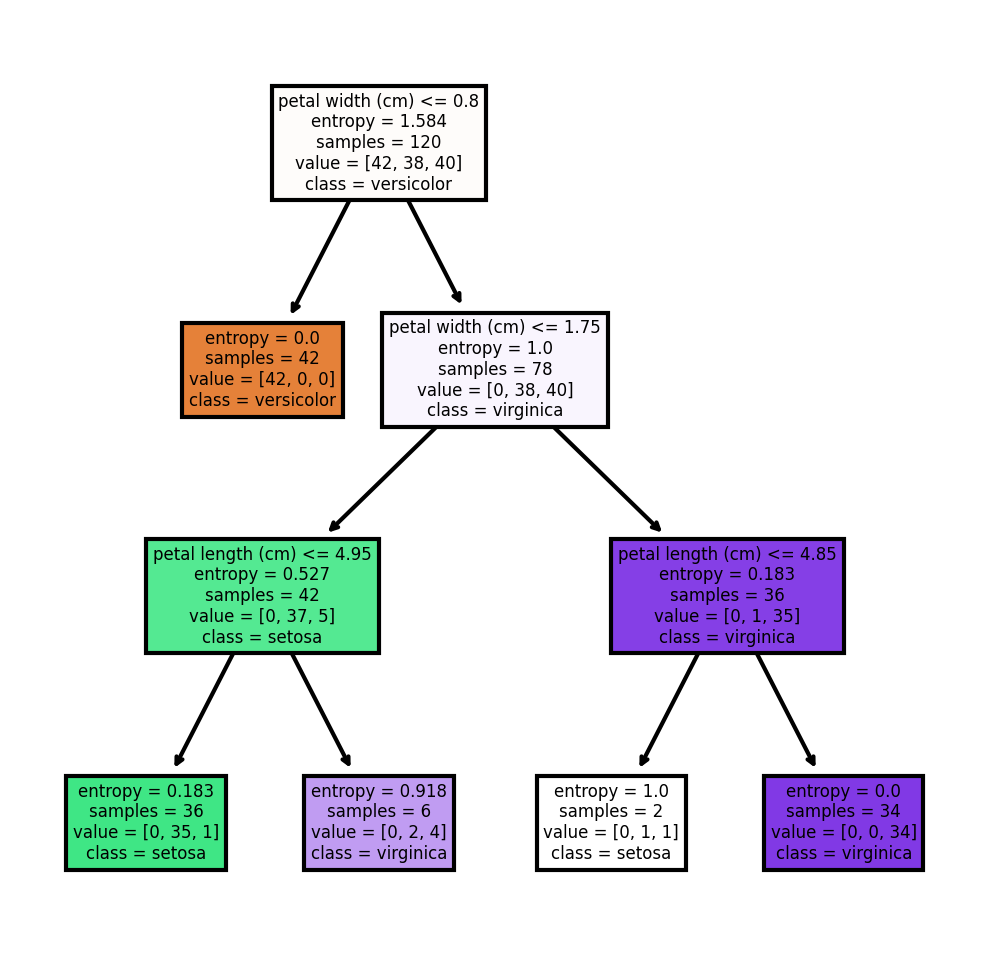

In [57]:
#to get a better picture
fn=['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
cn=['versicolor', 'setosa', 'virginica']
fig, axes=plt.subplots(nrows=1, ncols=1, figsize=(4,4), dpi=300)
tree.plot_tree(model, feature_names = fn, class_names = cn, filled=True )

In [58]:
#predict on test data
pred=model.predict(x_test)
pd.Series(pred).value_counts()

1    13
2     9
0     8
dtype: int64

In [59]:
pred

array([0, 1, 2, 2, 1, 2, 1, 1, 1, 0, 1, 0, 0, 1, 1, 2, 2, 2, 1, 1, 2, 2,
       1, 0, 1, 0, 0, 2, 0, 1])

In [60]:
#getting 2 way table of y_test and pred
pd.crosstab(y_test, pred)

col_0,0,1,2
iris,,,
0,8,0,0
1,0,12,0
2,0,1,9


In [61]:
#Accuracy
np.mean(pred==y_test)

0.9666666666666667